In [1]:
import numpy as np
import matplotlib.pyplot as plt
from library.basic_functions import truncate_to_decimal_places
from tqdm import tqdm, trange
from library.matrix import Matrix

# Q1

Solve the following equation to an accuracy of 10−6, starting from an initial guess interval [1.5, 2.5]:

$$\log(x/2) - \sin(5x/2) = 0$$

using Regula-falsi and Newton-Raphson and compare the two with respect to convergence

In [2]:
from library.nonlinear_equations import solve_regula_falsi, solve_newton_raphson

In [3]:
def func(x):  # $\log(x/2) - \sin(5x/2) = 0$
    return np.log(x/2) - np.sin(5*x/2)

def dfunc(x):  # derivative of func
	return 1/(2*x) - 5*np.cos(5*x/2)/2

ans1 = solve_regula_falsi(func, [1.5, 2.5], delta = 1e-6)
print(f"Regula Falsi: {ans1}")

# ans2 = solve_newton_raphson(func, guess=1.5, delta = 1e-6)  # numerical derivative
ans2 = solve_newton_raphson(func, dfunc, 1.5, delta = 1e-6)
print(f"Newton-Raphson: {truncate_to_decimal_places(ans2, 6)}")

Regula Falsi: 1.401929
Newton-Raphson: 1.401929


# Q2

Equation for heat conduction in a thin, un-insulated rod of length L = 10 m is

$$\frac{d^2T}{dx^2} + \alpha(T_\alpha - T) = 0$$

where the heat transfer coefficient $\alpha = 0.01 m^{-2}$ parameterizes heat dissipated to the surrounding air and $T_a = 20^o C$ is the ambient temperature. If $T(x = 0) = 40^o C$ and $T(x = L) = 200^o C$, solve the boundary value problem using Shooting Method with RK4 integrator and determine at what x the temperature is $T = 100^o C$

In [4]:
from library.diffeq import shooting_method
from library.interpolation import interpolate
from library.matrix import truncate_p

The temperature is 100 degree centigrade at x = 4.431


Text(0, 0.5, 'T ($^\\circ C$)')

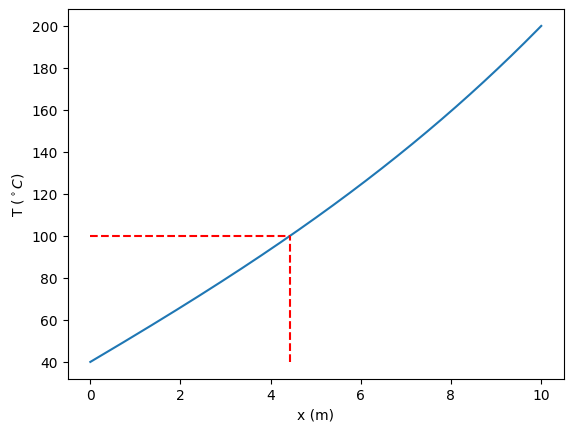

In [5]:
alpha = 0.01
Ta = 20
def f1(x, T, z):
    return z
def f2(x, T, z):
    return alpha*(T - Ta)

xi = 0
Ti = 40
xf = 10
Tf = 200
h = 0.01
tol = 1e-3

x, T, z = shooting_method(f1, f2, xi, Ti, xf, Tf, h, tol)
T100 = interpolate(100, T, x)
print("The temperature is 100 degree centigrade at x =", truncate_p(T100,3,str))
plt.plot(x, T)
plt.plot([0, T100], [100, 100], "r--")
plt.plot([T100, T100], [40, 100], "r--")
plt.xlabel("x (m)")
plt.ylabel(r"T ($^\circ C$)")

# Q3

Solve the 1-dimensional heat equation $u_{xx} = u_t$ over a conducting bar, of length 2 units, kept at $0\degree C$ but is heated to $300\degree C$ at its center at time $t = 0$. Choose your $\Delta x$ and $\Delta t$ with care such that $\frac{\Delta t}{(\Delta x)^2} \ll 0.5$

In [6]:
from library.diffeq import heat_eq

In [7]:
def temp(Nx, i):
    if i == Nx/2: return 300
    return 1

Lx = 2
Nx = 20
Lt = 1
Nt = 20000
sol = heat_eq(temp, Lx, Nx, Lt, Nt, needed=1001)

alpha=0.004999999999999999


100%|██████████| 1000/1000 [00:00<00:00, 200502.13it/s]


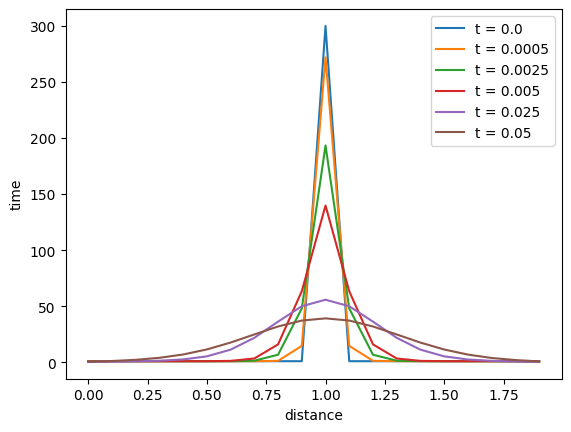

In [8]:
# Plotting the temperature curves at different times
times = [0, 10, 50, 100, 500, 1000]
x = [i*Lx/Nx for i in range(Nx)]
for time in times:
    plt.plot(x, sol[time], label=f"t = {time*Lt/Nt}")

plt.xlabel("distance")
plt.ylabel("time")
plt.legend()

100%|██████████| 1000/1000 [00:00<00:00, 3172695.92it/s]


Text(0, 0.5, 'time steps $(\\times 100)$')

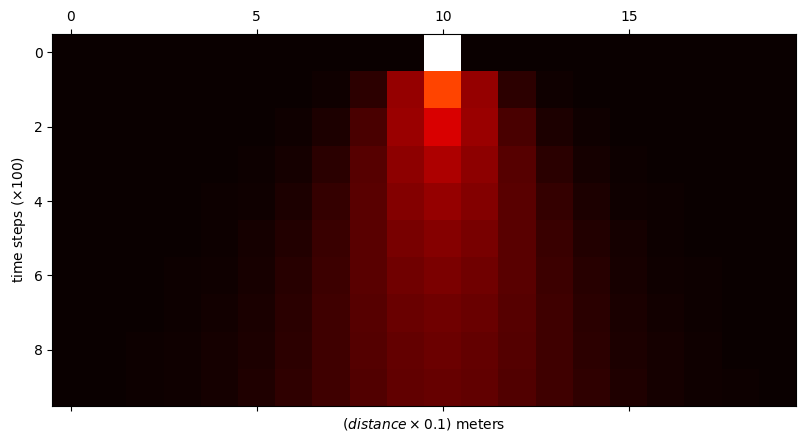

In [9]:
# Plotting Heat Map
plt.matshow([sol[i] for i in tqdm(range(1000)) if not i%100], cmap="hot")
plt.xlabel(r"$(distance \times 0.1)$ meters")
plt.ylabel(r"time steps $(\times 100)$")

# Q4: A 2 meter long beam has a linear mass density $\lambda(x) = x^2$,  where x is measured from one its ends. Find the center of mass of the beam numerically using method of your choice. Report answer  correct upto 4 decimal places.

I have solved this problem in two methods

In [10]:
from library.matrix import truncate_p as truncate
from library.integration import simpson_rule

## A. Naive approach:
Here I (as a human) have to calculate a lot of things and simplify it to a single expression. <br>
This approach guarantees that the result is correct and deterministically reaches the answer. <br>
But here, the computer does not do everything for us, we have to do a lot of calculations ourselves.

The formula for the center of mass is:

$$x_{COM} = \frac{\sum m_i x_i}{\sum m_i} = \frac{\int_0^M x dm}{M}\;\;\;\;\;[M = total\;mass]$$

now, mass density is given to be $\lambda(x) = x^2$, so the center of mass will be at:

$$x_{COM} = \frac{\int \lambda x dx}{\int xdx}$$

Putting the value of $\lambda(x)=x^2$ in the above equation, we get:

$$x_{COM} = \frac{\int_0^2 x^3 dx}{\int_0^2 x^2dx}$$



In [11]:
lower_limit = 0
upper_limit = 2
steps = 3
a = simpson_rule(lambda x: x**3, lower_limit, upper_limit, steps)
b = simpson_rule(lambda x: x**2, lower_limit, upper_limit, steps)
x_COM = a/b
print(f"Center of mass is at x = {truncate(x_COM, 4)}m")
# value was supposed to come out to be x = 1.5m.
# The small error can be avoided if we took more steps

Center of mass is at x = 1.4999m


## B. More intuitive approach

Lazy me wanted my computer to do all the work

### Aim:
&emsp;To find the center of mass of the beam with mass density $\lambda(x) = x^2$.

### Theory:
&emsp;Let us use the fact that, if a body is pivoted at its center of mass, it will not rotate (net torque on it will be zero). So, we will try to find the net torque on the body if pivoted at a random position $a$. Then we will minimise the net torque (minimum value will be close to 0) by adjusting the $a$ to find the center of mass. This idea is inspired from the linear regression algorithm.

### Method:
 - start at a random location on the beam (we have started with $a = 0$)
 - find torque on the beam if pivoted at that location (point $a$)
 - change the value of $a$ depending on the torque (if torque is positive, move a to the right, if negative, move a to the left. Also the distance by which we move $a$ is proportional (proportionality constant is $\alpha$) to the torque)
 - with every step, we will reach a point where the torque will be lesser and lesser. Thus we will keep on taking smaller and smaller steps until we reach a point where the torque is almost zero. This point will be the center of mass of the beam. (**Note:** If we take a large value of $\alpha$, the algorithm may not converge to the correct answer, rather it will diverge out. If we take a small value of $\alpha$, the algorithm will take a lot of time to converge to the correct answer. So, we have to choose a value of $\alpha$ such that the algorithm converges to the correct answer in a reasonable amount of time.)

In [12]:
def get_torque(a):
	f_wrt_a = lambda x: (x-a)*x**2
	torque_left = simpson_rule(f_wrt_a,  0,  a,  n=4)
	torque_right = simpson_rule(f_wrt_a,  a,  2,  n=4)
    # simpson rule acts so good here because the f_wrt_a is a tertiary function
    # and simpson rule is based upon quadratic model... 2 and 3 are close numbers
	return torque_left + torque_right

# Testing the function:
get_torque(2.5)

-2.666666666666667

In [13]:
tollerance = 1e-6
func = lambda x: x**2
alpha = 0.4  # carefully chosen to reduce the number of steps

net_torque = 1  # initiate at any value more than tollerance
a = 0  # initiate at any point on the rod (0, 2)... although it doesn't matter
steps = 0  # for counting the steps
found = True  

net_torques = []
positions = []
while abs(net_torque)>tollerance:
    net_torque = get_torque(a)
    net_torques.append(abs(net_torque))  # just keeping the records
    positions.append(a)  # just keeping the records
    print(f"Step {steps+1}:\ta = {truncate(a, 4, str)},", end = " ")
    a += net_torque*alpha  # Updating a
    print(f"net_torque = {truncate(net_torque, 4, str)}")
    if len(net_torques)-1 and net_torques[-1] > net_torques[-2]:
        print("The net_torque is increasing, the algorithm is diverging, decreasing the value of alpha might help!")
        found = False
        break
    steps += 1

if found: print(f"Center of mass is at x = {truncate(a, 4, str)}m (took {steps} steps)")

Step 1:	a = 0, net_torque = 4.0000
Step 2:	a = 1.6000, net_torque = -0.2666
Step 3:	a = 1.4933, net_torque = 0.0177
Step 4:	a = 1.5004, net_torque = -0.0011
Step 5:	a = 1.4999, net_torque = 0.0000
Step 6:	a = 1.5000, net_torque = -0.0000
Step 7:	a = 1.4999, net_torque = 0.0000
Center of mass is at x = 1.5000m (took 7 steps)


### Demonstration:

&emsp; Dotted lines are only for directing your eyes to the point of interest. The magenta dotted line is the variation of absolute value of torque with $a$. The cyan dotted line denotes the change in $a$ with each iteration. **(points on the cyan line don't mean anything)**

&emsp; Although I am not backing my claim with mathematically rigorous proof, but from the graph we can see that the variation of torque with $a$ is a linear curve with slope $-\frac{8}{3}$ and the curve intersects the x-axis at $a = 1.5$. So, the center of mass is at $a = 1.5$.

#### Here are some graphs for different values of $\alpha$:

(Code for generating this graph can be found in appendix.)

| alpha = 0.65 | alpha = 0.1 | alpha = 0.8 |
|:---:|:---:|:---:|
|<img src="https://peithonking.github.io/comp_phys_P346/static/ass5_1.png" alt="alpha = 0.65" width="90%">|<img src="https://peithonking.github.io/comp_phys_P346/static/ass5_2.png" alt="alpha = 0.1" width="90%">|<img src="https://peithonking.github.io/comp_phys_P346/static/ass5_3.png" alt="alpha = 0.8" width="90%">|

# Q5: Use LU decomposition to solve this set of linear equations


$19 = a_1-a_2+4a_3+2a_5+9a_6$

$2 = 5a_2-2a_3+7a_4+8a_5+4a_6$

$13 = a_1+5a_3+7a_4+3a_5-2a_6$

$-7 = 6a_1-a_2+2a_3+3a_4+8a_6$

$-9 = -4a_1+2a_2+5a_4-5a_5+3a_6$

$2 = 7a_2-a_3+5a_4+4a_5-2a_6$

In [14]:
# defining the number of places to show after the decimal point
precision = 3

# Defining the Given Matrices again because gauss jordan did inplace operations and changed the matrices
A = Matrix(
    [
        [1, -1, 4, 0, 2, 9],
        [0, 5, -2, 7, 8, 4],
        [1, 0, 5, 7, 3, -2],
        [6, -1, 2, 3, 0, 8],
        [-4, 2, 0, 5, -5, 3],
        [0, 7, -1, 5, 4, -2],
    ], "A", precision
)

B = Matrix(
    [
        [19],
		[2],
		[13],
		[-7],
		[-9],
		[2]
    ], "B", precision
)

In [20]:
from library.linear_equations import LU_Decomposition, forward_propagation, backward_propagation

L, U = LU_Decomposition(A)
y = forward_propagation(L, B)
x = backward_propagation(U, y)

print("The solution is:")

# x = np.array(x.mat).flatten()

print(x)

The solution is:
x = |15.788|
    |-3.954|
    |-0.153|
    |2.951  |
    |0.120  |
    |-0.041|



# Appendix

## Q4:

Generating demonstaration graph

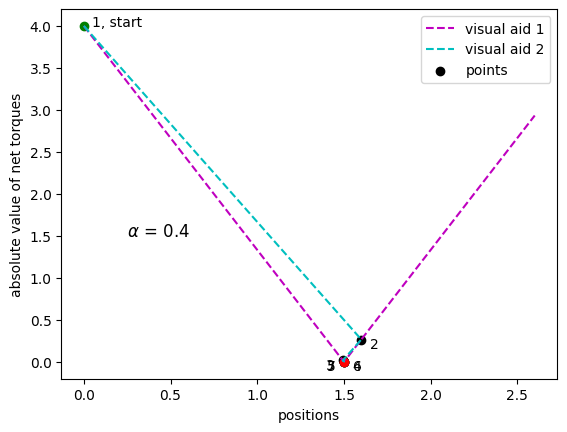

In [26]:
import matplotlib.pyplot as plt
from library.matrix import linspace
g1 = lambda x: abs(-(8/3)*x+4)

# PLOTTING
xs = linspace(0, 2.6, 100)
plt.plot(xs, [g1(xs) for xs in xs], "m--")  # visual aid 1
plt.plot(positions, net_torques, "c--")  # visual aid 2: line joining points
plt.scatter(positions[1:-1], net_torques[1:-1], c="#000000")  # points
plt.scatter(positions[0], net_torques[0], c="g")  
plt.scatter(positions[-1], net_torques[-1], c="r")

# annotating points
try:
    plt.annotate("1, start", (positions[0]+0.05, net_torques[0]))
    for i in range(6):
        offset = -0.1 if i%2 else 0.05
        plt.annotate(f"{i+2}", (positions[i+1]+offset, net_torques[i+1]-0.1))
    plt.annotate("and so on...", (positions[7]+0.05, net_torques[7]-0.1))
    plt.annotate(f"{len(positions)}, end", (positions[-1]+0.05, net_torques[-1]-0.1))
except IndexError:
    pass

# Legends and Labels
plt.legend(["visual aid 1", "visual aid 2", "points"])
plt.xlabel("positions")
plt.ylabel("absolute value of net torques")
plt.text(0.25, 1.5, f"$\\alpha$ = {alpha}", fontsize=12)
if not found:
    plt.text(0.25, 1, f"Didn't converge", fontsize=12)